**Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
sales = pd.read_csv("/content/drive/MyDrive/supermarket_sales - Sheet1.csv")

In [7]:
sales.head()

# sales.columns

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

By inspection, the 'Date' datatype is an object, we need to change it to datetime

In [9]:
sales['date'] = pd.to_datetime(sales['Date'])


In [10]:
sales['date'].dtype

dtype('<M8[ns]')

In [11]:
type(sales['date'])

pandas.core.series.Series

In [12]:
sales['date'] = pd.to_datetime(sales['date'])

In [13]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [14]:
sales['Time'] = pd.to_datetime(sales['Time'])

In [15]:
sales['Hour'] = (sales['Time']).dt.hour    #type(sales['Time'])

Unique hours of sales in this dataset

In [16]:
sales['Hour'].nunique()  #gives us the number of unique hours

11

In [17]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [18]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


### EDA

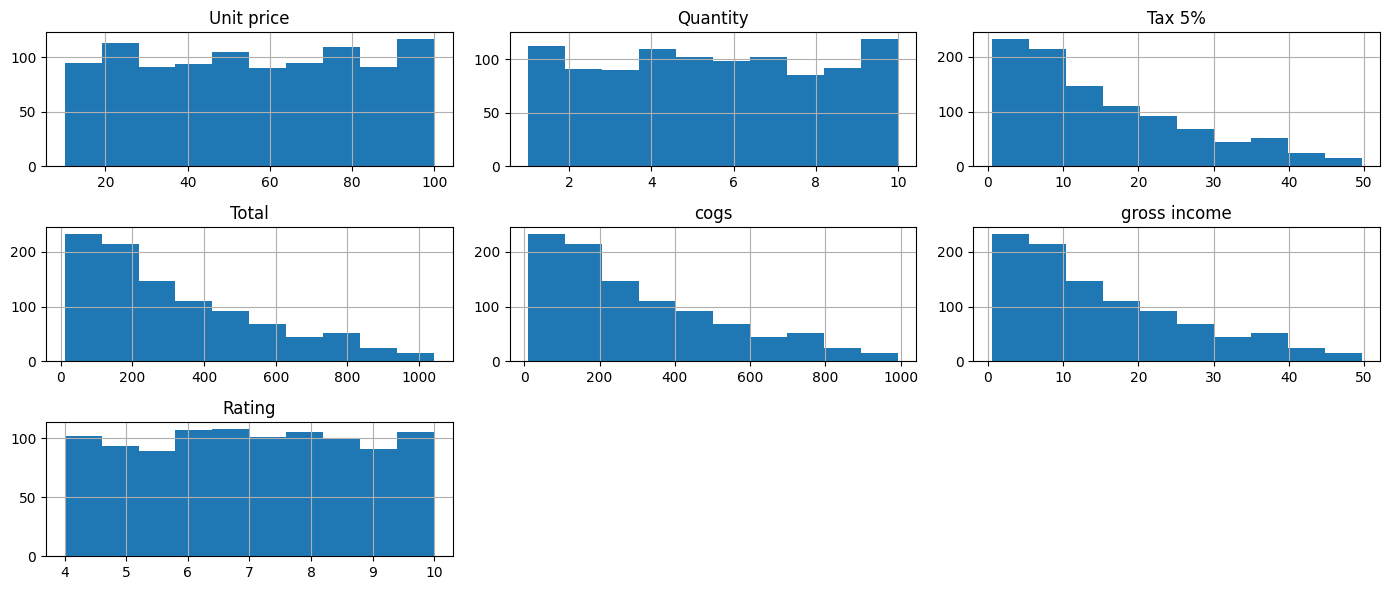

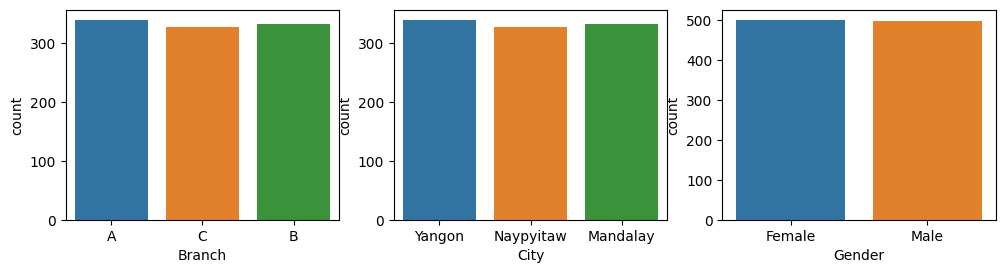

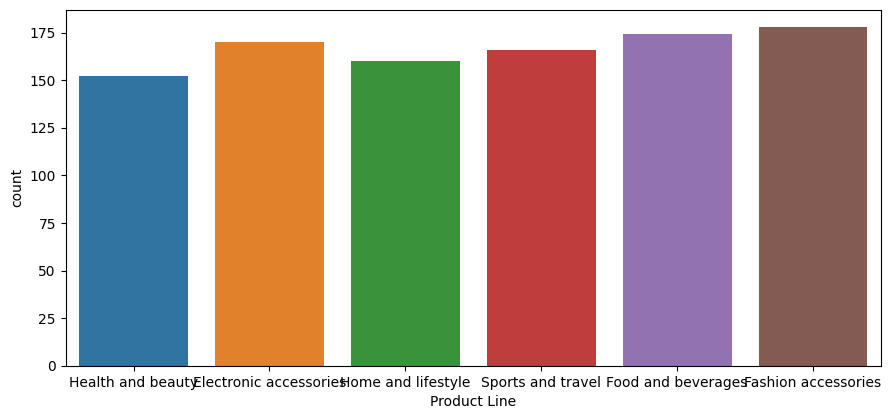

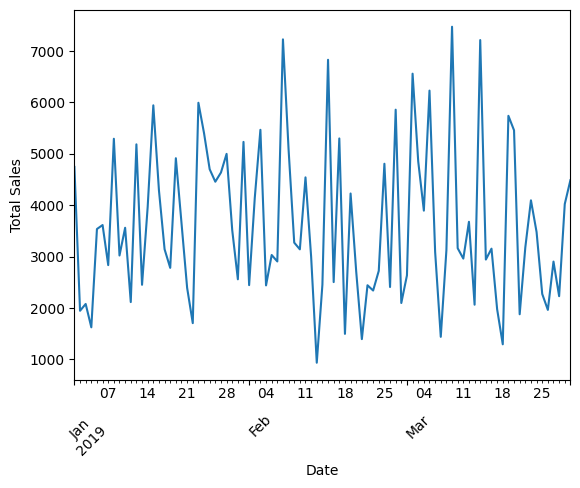

<ipython-input-19-603c767a17d3>:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales, x='Gender', y='Rating', ci=None)


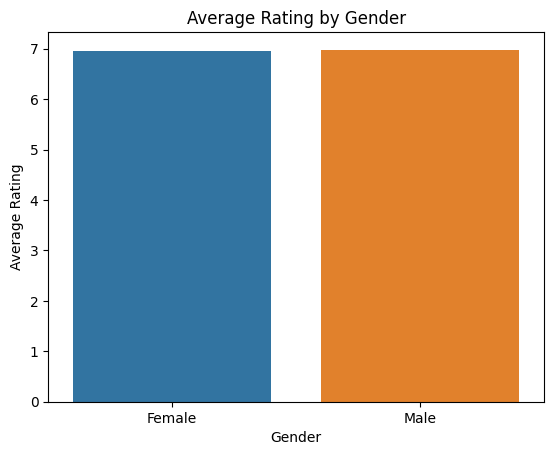

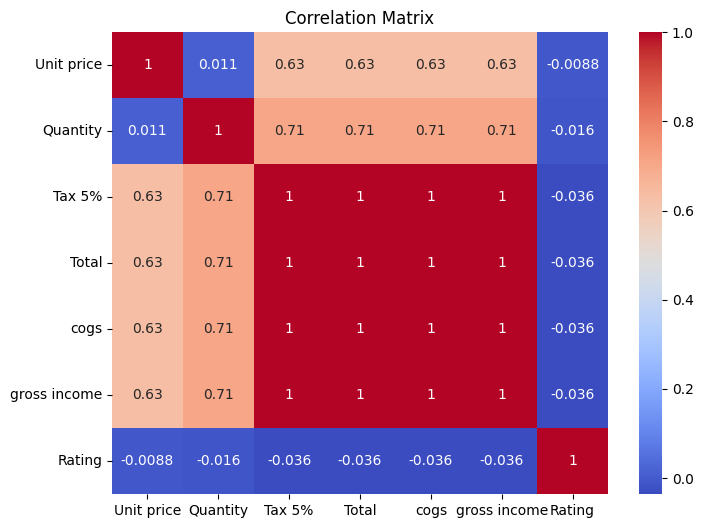

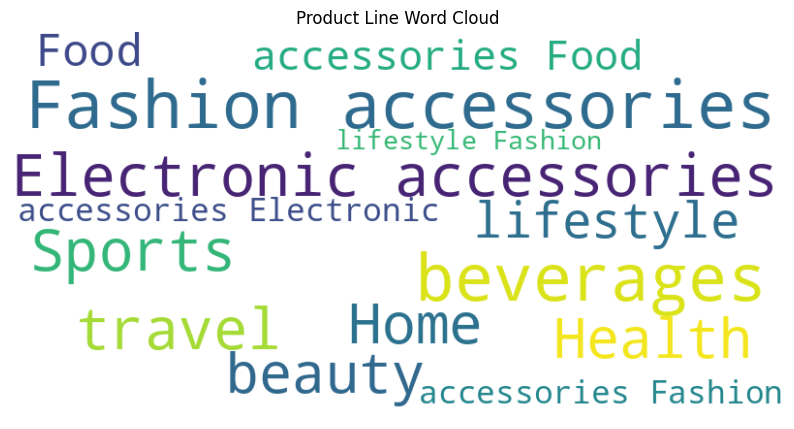

In [19]:

# Distribution Analysis
# Histograms of numerical variables
sales.hist(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating'], bins=10, figsize = (14,6))
plt.tight_layout()
plt.show()

print("\n")

# # Count plots of categorical variables
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.countplot(data=sales, x='Branch')
plt.xlabel('Branch')

plt.subplot(2, 3, 2)
sns.countplot(data=sales, x='City')
plt.xlabel('City')


plt.subplot(2, 3, 3)
sns.countplot(data=sales, x='Gender')
plt.xlabel('Gender')

plt.figure(figsize=(26, 8))
plt.subplot(2, 3, 4)
sns.countplot(data=sales, x='Product line')
plt.xlabel('Product Line')

plt.tight_layout()
plt.show()


# Temporal Analysis
# Convert 'Date' column to datetime type
sales['Date'] = pd.to_datetime(sales['Date'])
# Line plot of Total sales over time
sales.groupby('Date')['Total'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Customer Analysis
# Bar plot of average Rating by Gender
sns.barplot(data=sales, x='Gender', y='Rating', ci=None)
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.title('Average Rating by Gender')
plt.show()

# Correlation Analysis
# Compute correlation matrix
corr_matrix = sales[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']].corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix')
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Word Cloud
# Concatenate all the product lines into a single string
product_lines = ' '.join(sales['Product line'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(product_lines)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Product Line Word Cloud')
plt.show()


In [20]:
# import numpy as np

# # Box plot of Total sales by Product line
# plt.figure(figsize=(10, 6))
# ax = sns.boxplot(data=sales, x='Product line', y='Total', showfliers=False)
# sns.stripplot(data=sales, x='Product line', y='Total', color='black', alpha=0.5)
# plt.ylabel('Total Sales')
# plt.xticks(rotation=45)
# plt.title("Total sales by Product line")

# # Calculate the statistics for each Product line
# statistics = sales.groupby('Product line')['Total'].quantile([0, 0.25, 0.5, 0.75, 1]).unstack()

# # Add labels to the box plot
# for i, patch in enumerate(ax.artists):
#     x = patch.get_x() + patch.get_width() / 2
#     y = statistics.iloc[i].values
#     labels = [f'Min: {y[0]}', f'Q1: {y[1]}', f'Median: {y[2]}', f'Q3: {y[3]}', f'Max: {y[4]}']
#     for j, label in enumerate(labels):
#         ax.text(x, y[j], label, ha='center', va='bottom', fontsize=8)

# plt.show()


In [21]:

# Calculate statistics for labeling
statistics = sales.groupby('Product line')['Total'].describe()

# Create the box plot using Plotly Express
fig = px.box(sales, x='Product line', y='Total', points='all')
fig.update_traces(marker=dict(color='black', opacity=0.5), boxpoints='all')

# Add labels to the plot
for i, line in enumerate(fig.data):
    product_line = line['x'][0]
    q1 = statistics.loc[product_line, '25%']
    median = statistics.loc[product_line, '50%']
    q3 = statistics.loc[product_line, '75%']
    minimum = statistics.loc[product_line, 'min']
    maximum = statistics.loc[product_line, 'max']
    mean = statistics.loc[product_line, 'mean']

    fig.add_annotation(x=product_line, y=minimum, text=f'Min: {minimum:.2f}', showarrow=False)
    fig.add_annotation(x=product_line, y=q1, text=f'Q1: {q1:.2f}', showarrow=False)
    fig.add_annotation(x=product_line, y=median, text=f'Median: {median:.2f}', showarrow=False)
    fig.add_annotation(x=product_line, y=q3, text=f'Q3: {q3:.2f}', showarrow=False)
    fig.add_annotation(x=product_line, y=maximum, text=f'Max: {maximum:.2f}', showarrow=False)
    fig.add_annotation(x=product_line, y=mean, text=f'Mean: {mean:.2f}', showarrow=False)

# Customize layout
fig.update_layout(
    title='Total sales by Product line',
    xaxis_title='Product line',
    yaxis_title='Total Sales',
    xaxis_tickangle=-45,
    boxmode='group',
)

fig.show()


###Cleaning data

In [22]:
#Handling Missing Values:

#To check for missing values:
null = sales.isnull().sum()
print(null)

#To fill missing values with mean:
sales.fillna(sales.mean(), inplace=True)

# To drop rows with missing values:
sales.dropna(inplace=True)

# Removing Duplicates:
sales.drop_duplicates(inplace=True)


# Removing Outliers: Using Z-score method:

from scipy import stats
z_scores = stats.zscore(sales['Total'])
sales = sales[(np.abs(z_scores) < 3)]


# Using IQR method:

Q1 = sales['Total'].quantile(0.25)
Q3 = sales['Total'].quantile(0.75)
IQR = Q3 - Q1
sales = sales[~((sales['Total'] < (Q1 - 1.5 * IQR)) | (sales['Total'] > (Q3 + 1.5 * IQR)))]



#Standardizing and Normalizing Data: (Z-score normalization):

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sales['Total'] = scaler.fit_transform(sales['Total'].values.reshape(-1, 1))
print(sales)



sales.head(10)


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date                       0
day                        0
month                      0
year                       0
Hour                       0
dtype: int64
      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal 

<ipython-input-22-07c3c4d835bd>:8: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

<ipython-input-22-07c3c4d835bd>:8: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,0.978017,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,-0.994929,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,0.100681,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,0.725803,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,1.337490,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,1.309029,...,Ewallet,597.73,4.761905,29.8865,4.1,2019-03-25,25,3,2019,18
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,0.492813,...,Ewallet,413.04,4.761905,20.6520,5.8,2019-02-25,25,2,2019,14
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,1.918330,...,Ewallet,735.60,4.761905,36.7800,8.0,2019-02-24,24,2,2019,11
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,-1.012076,...,Credit card,72.52,4.761905,3.6260,7.2,2019-01-10,10,1,2019,17
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,-0.605493,...,Credit card,164.52,4.761905,8.2260,5.9,2019-02-20,20,2,2019,13


 ### Number of unique values in columns with object datatype

In [23]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [24]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [25]:
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


Text(0.5, 1.0, 'Ratings by Branch')

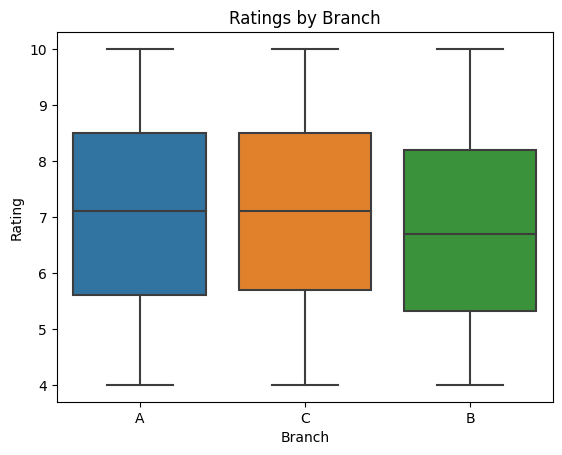

In [26]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch")

Branch B has the lowest rating among all the branches

*Sales by the hour in the company* Most of the item were sold around 14:00 hrs local time

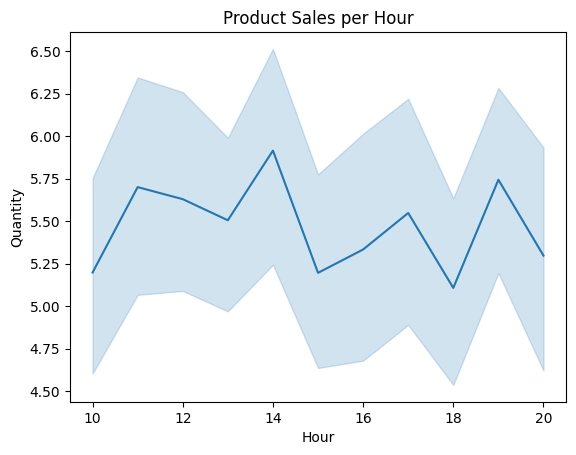

In [27]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

We can see how each branch's sales quantity looks like by the hour in a monthly fashion

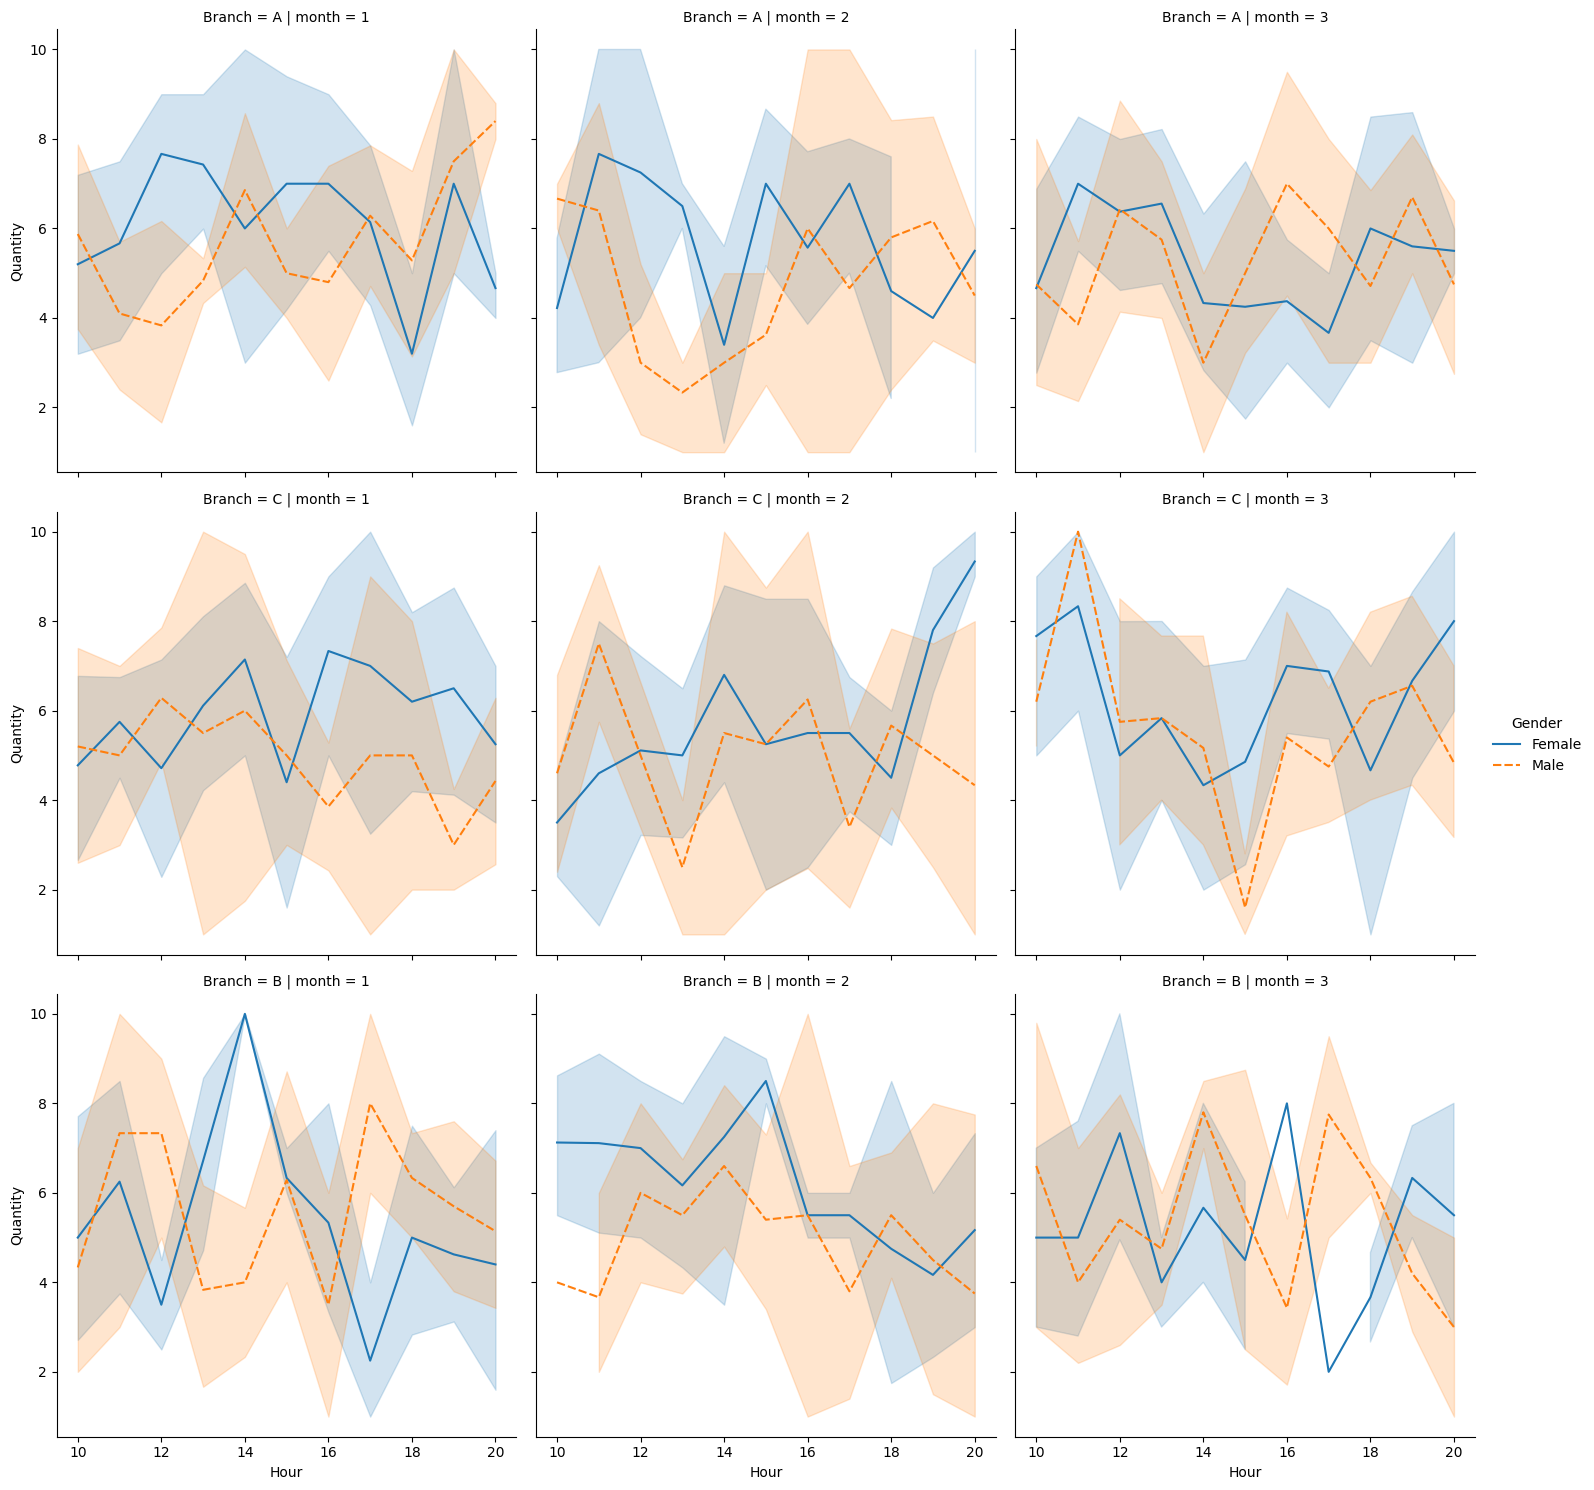

In [28]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

 Below we can see each branch's sales by the hour in a monthly fashion

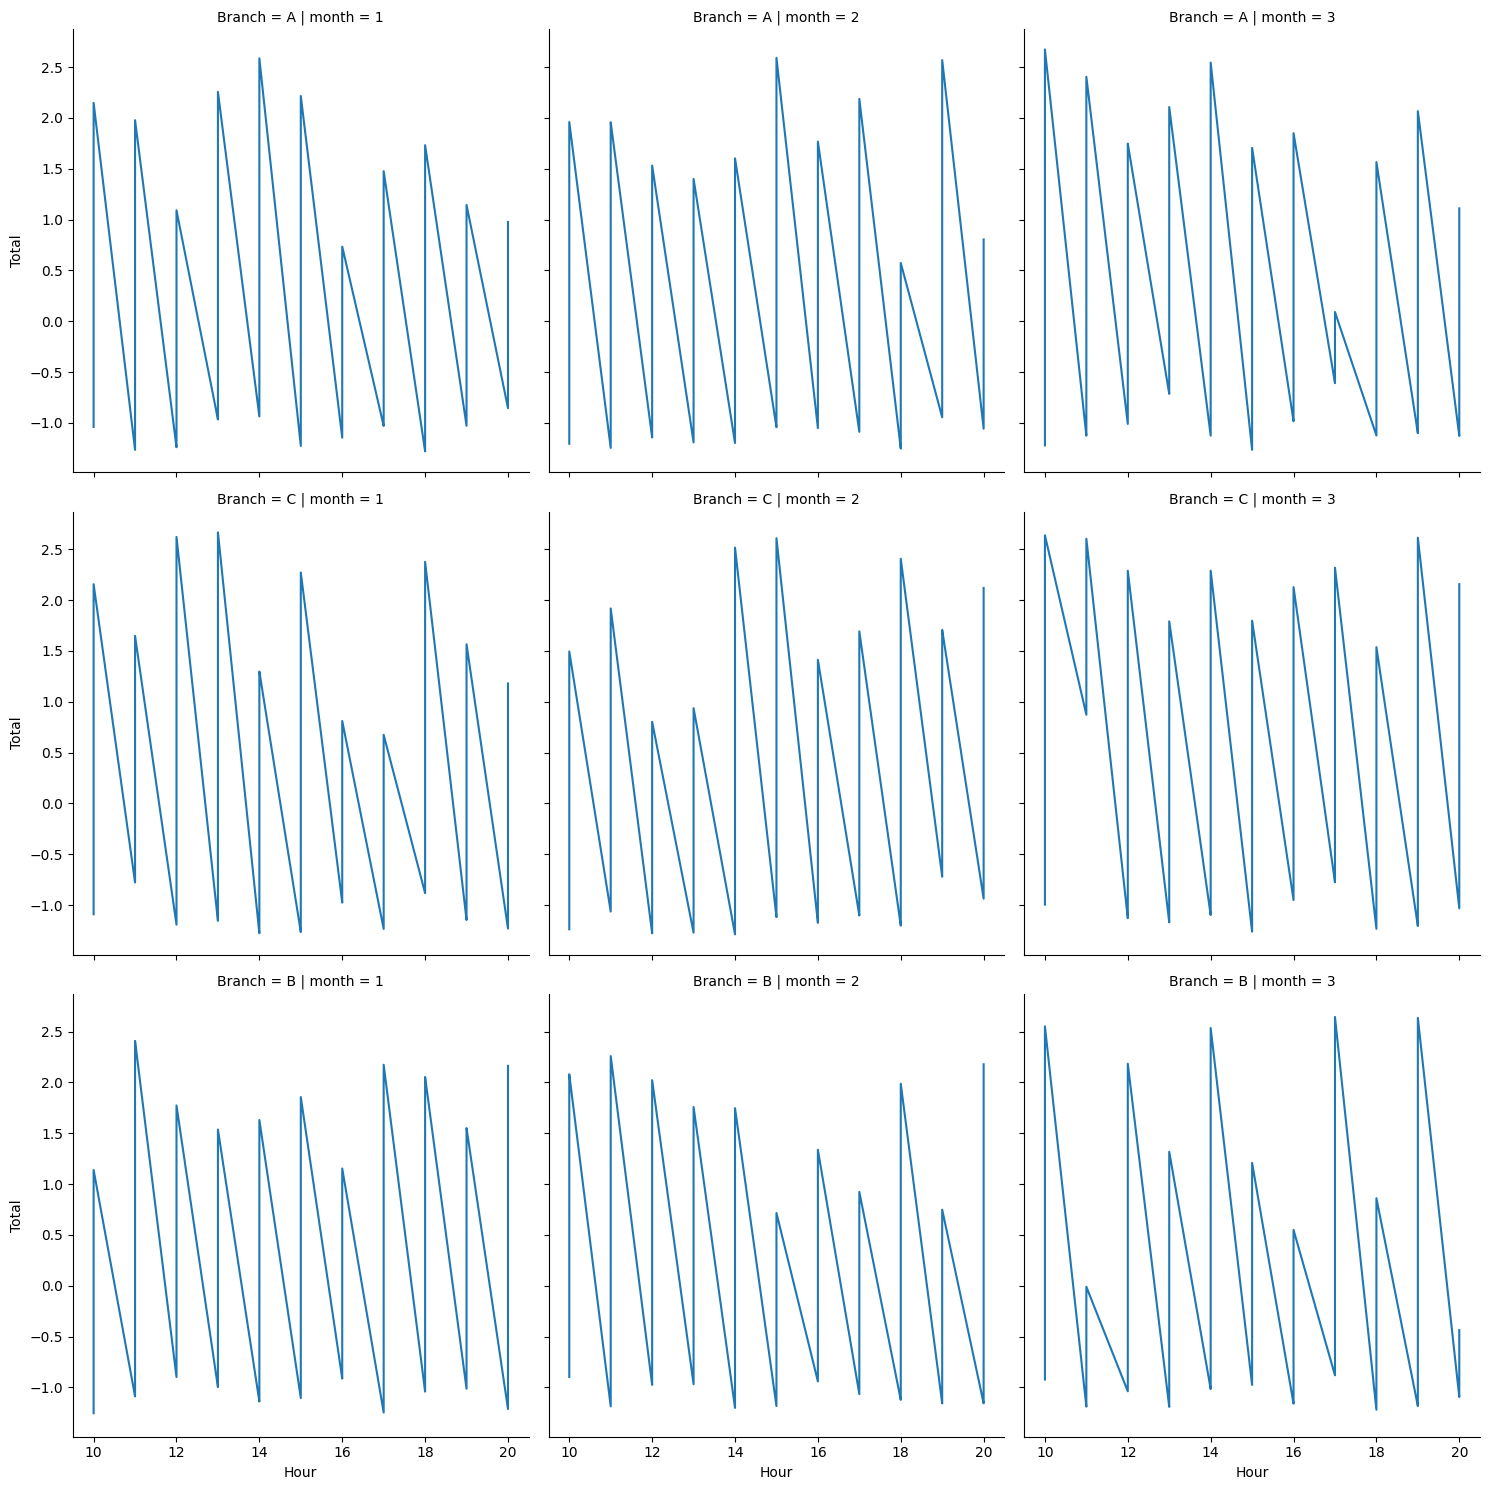

In [29]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

In [30]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

## Product Analysis

Let's look at the various products' performance.

<Axes: xlabel='Quantity', ylabel='Product line'>

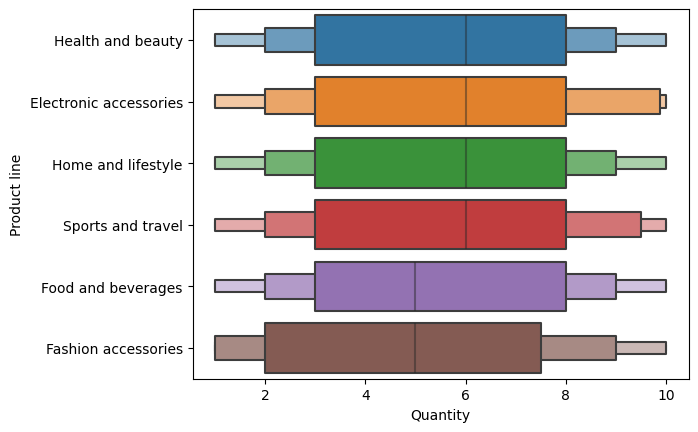

In [31]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

From the above visual, Health and Beauty,Electronic accessories, Home and lifestyle, Sports and travel have a better average quantity sales than food and beverages and Fashion accessories.

<Axes: xlabel='count', ylabel='Product line'>

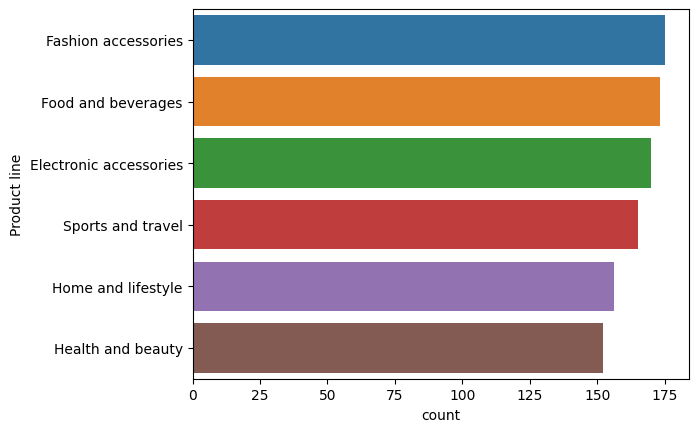

In [32]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

<Axes: xlabel='Total', ylabel='Product line'>

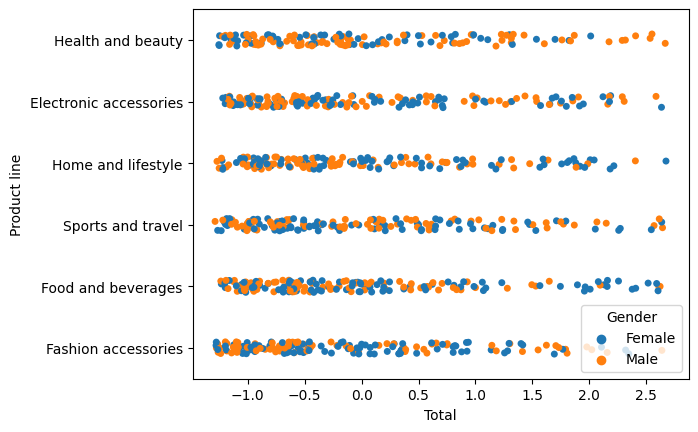

In [33]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

<Axes: xlabel='Rating', ylabel='Product line'>

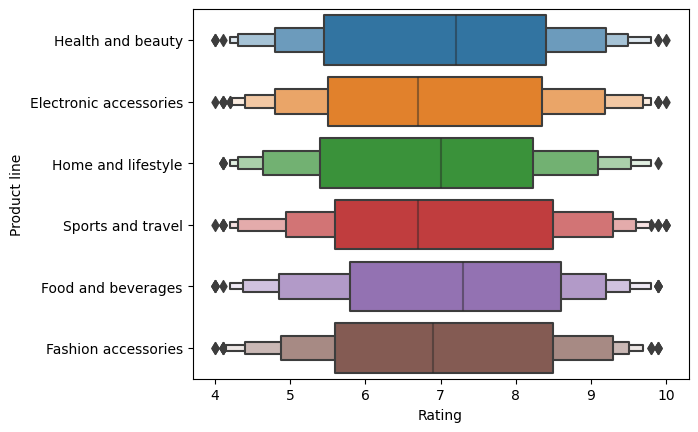

In [34]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

Food and Beverages have the highest average rating while sports and travel the lowest

Let's see when customers buy certain products in the various branches.

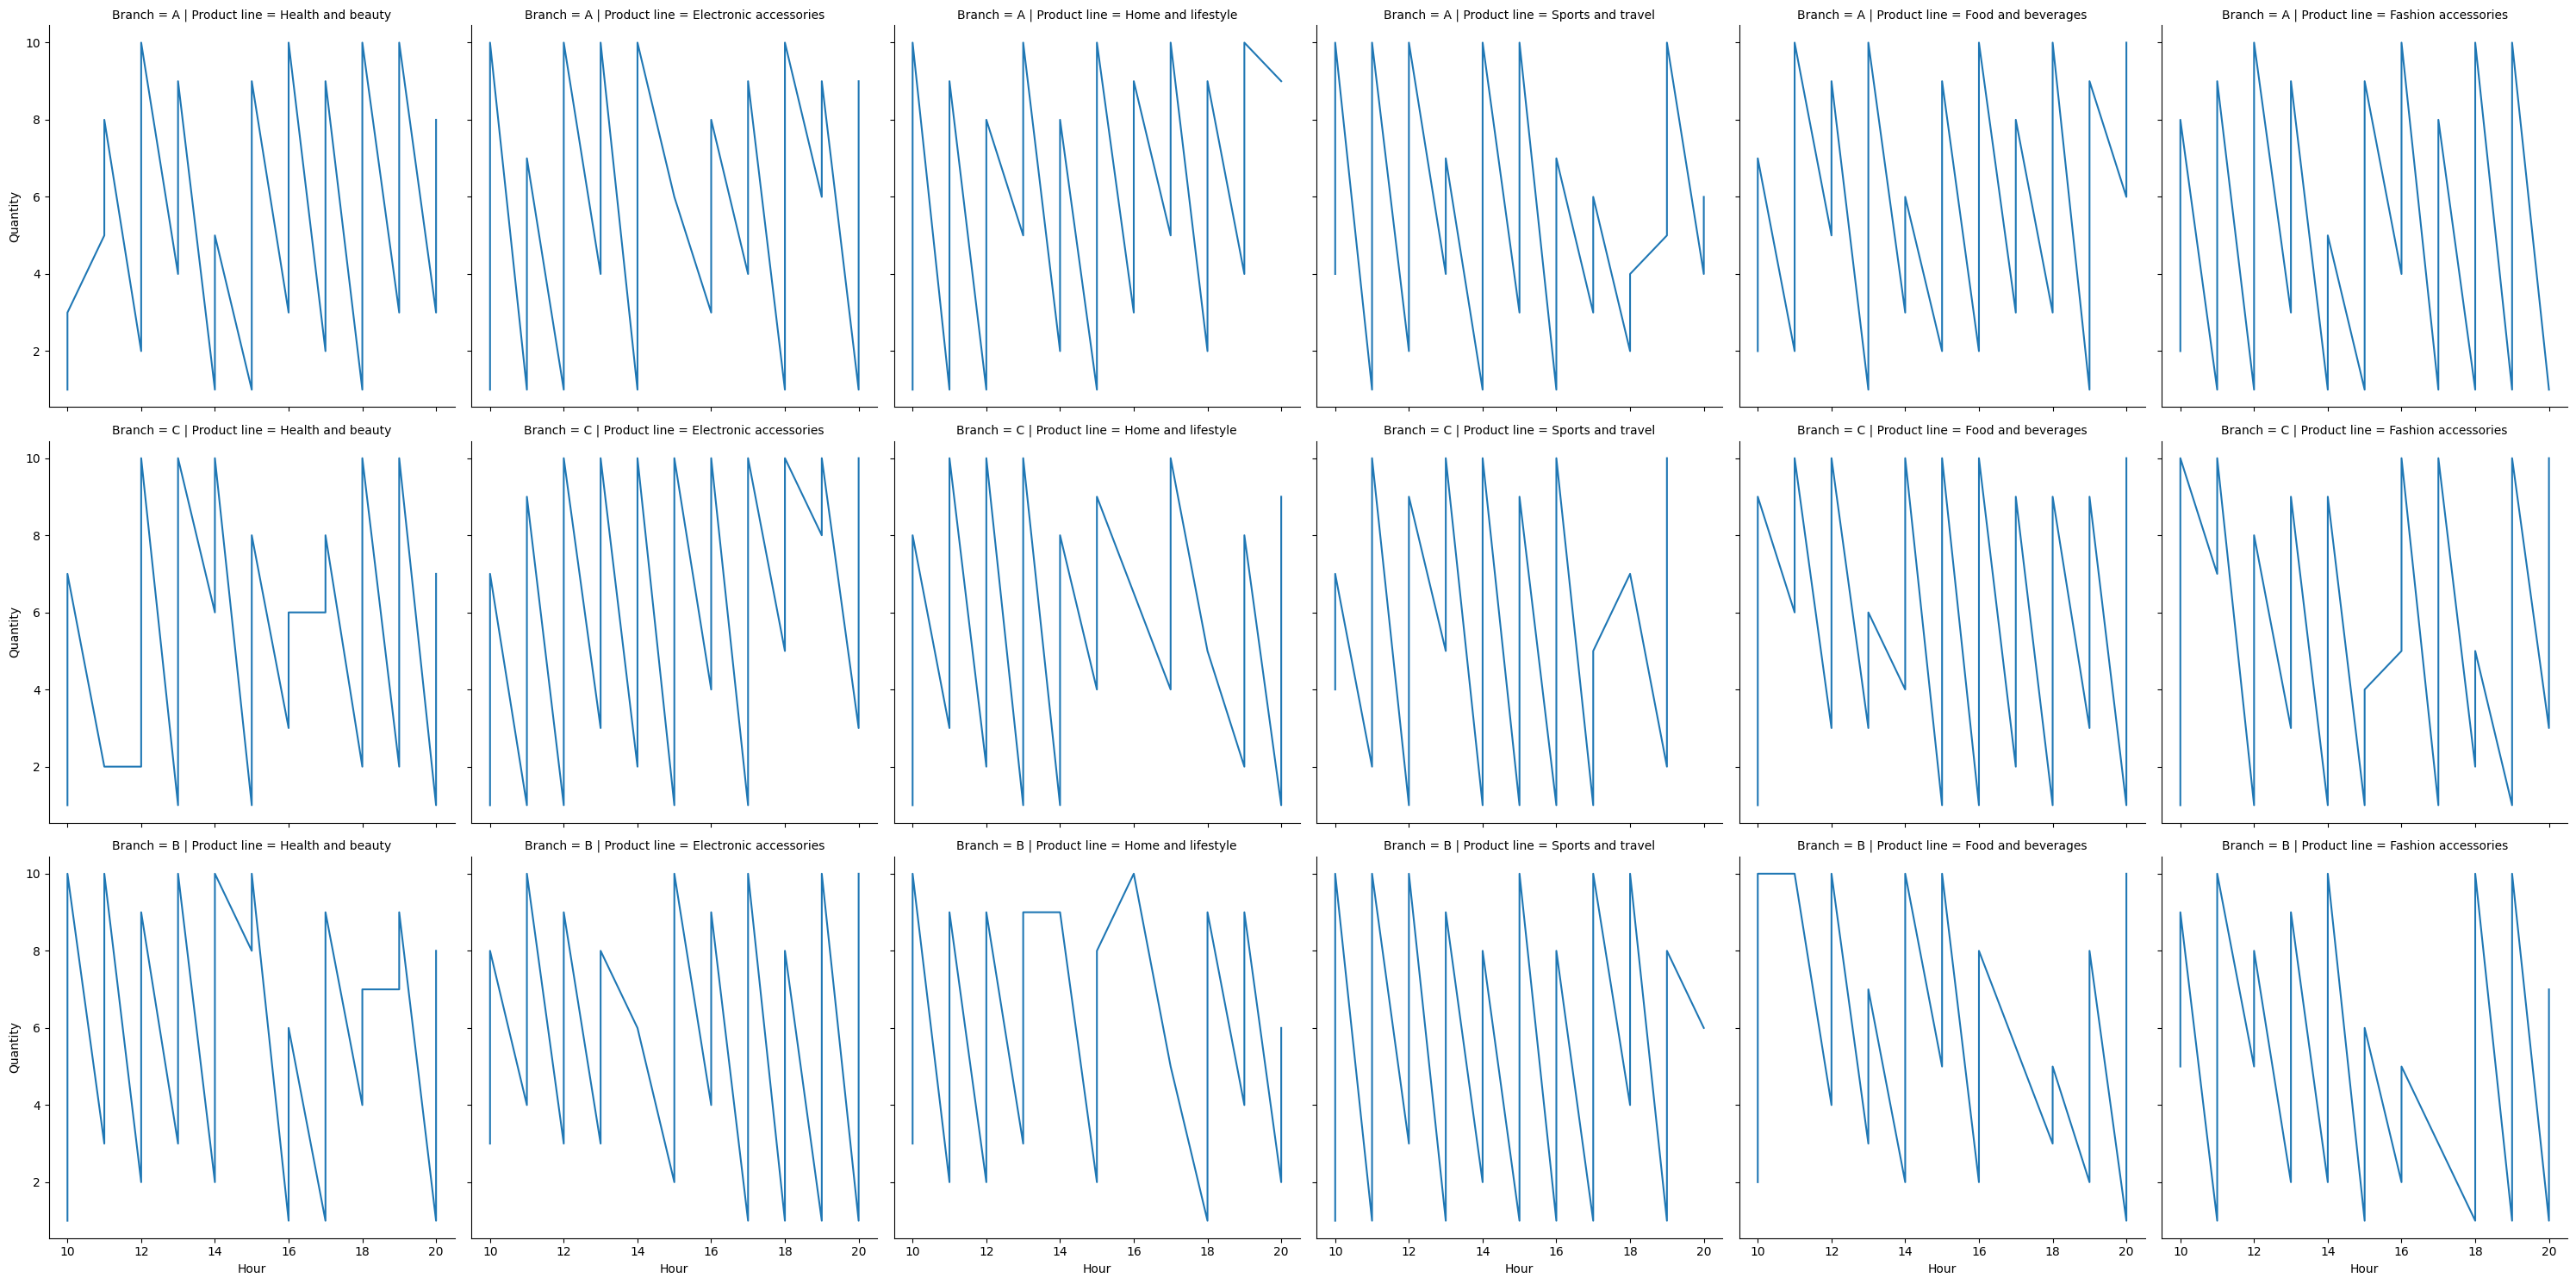

In [35]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00

# Payment Channel

Let see how customers make payment in this business

Text(0.5, 1.0, 'Payment Channel')

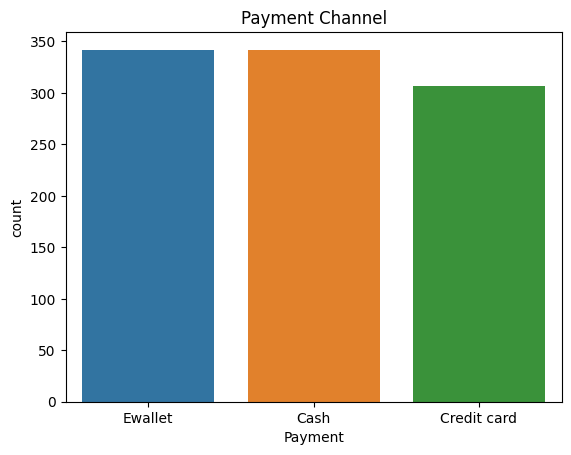

In [36]:
 sns.countplot(x="Payment", data =sales).set_title("Payment Channel")

Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card.  Below is the payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

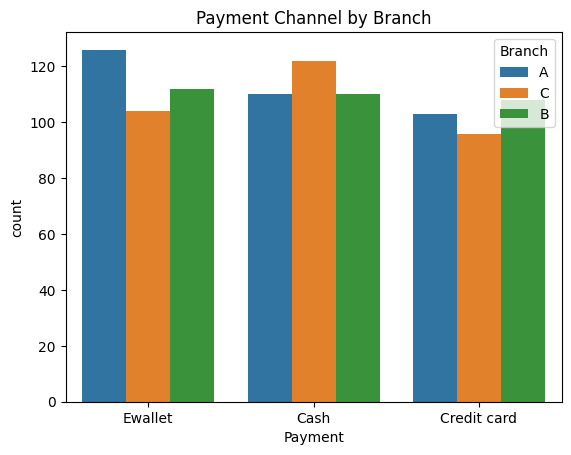

In [37]:
 sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch")

# Customer Analysis

There are two types of customers. Members and Normal.

In [38]:
sales['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

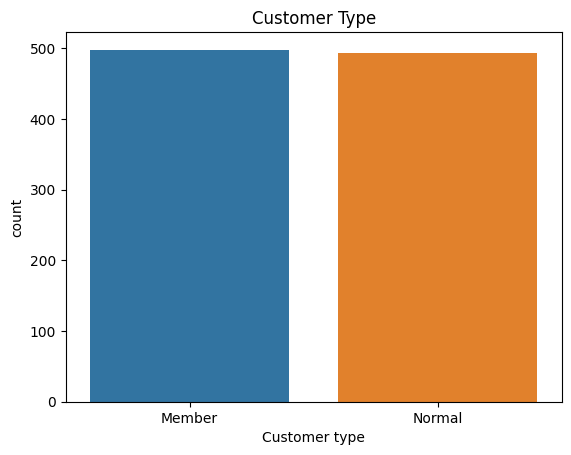

In [39]:
 sns.countplot(x="Customer type", data =sales).set_title("Customer Type")

Text(0.5, 1.0, 'Customer Type by Branch')

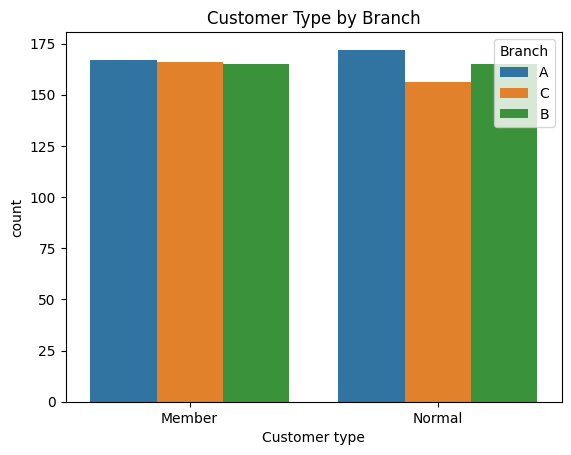

In [40]:
 sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch")

## Does customer type influences the sales

In [48]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,14.548037
Normal,-14.548037


Do the customer type influence customer rating?

Text(0.5, 1.0, 'Customer Type')

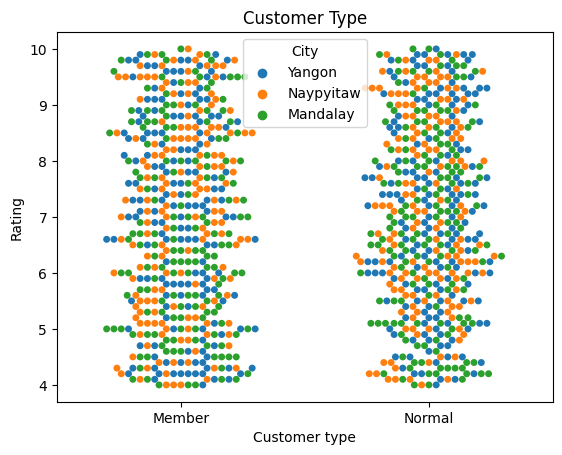

In [42]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type")

In [43]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'date', 'day', 'month', 'year', 'Hour'],
      dtype='object')

In [44]:

# Select the features for clustering
features = ['Unit price', 'Quantity', 'Total']

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
kmeans.fit(sales[features])

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the data
sales['Cluster'] = cluster_labels

# Analyze the results
cluster_centers = kmeans.cluster_centers_
cluster_counts = sales['Cluster'].value_counts()

# Print the cluster centers and counts
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Counts:")
print(cluster_counts)


Cluster Centers:
[[ 5.34144304e+01  5.40506329e+00 -5.45402984e-02]
 [ 2.43737421e+01  5.51886792e+00 -7.38745499e-01]
 [ 8.44959104e+01  5.48179272e+00  7.06318775e-01]]

Cluster Counts:
2    354
0    319
1    318
Name: Cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



There are three main types of customers:

**Type 1:** Customers who spend a moderate amount of money and buy a variety of products.

**Type 2:** Customers who spend a lot of money and buy high-value products.

**Type 3:** Customers who spend a small amount of money and buy a limited number of products.


###The algorithm also identified common type of customer, which is Type 1. This means that the majority of customers in the sales DataFrame ***spend a moderate amount of money and buy a variety of products.***



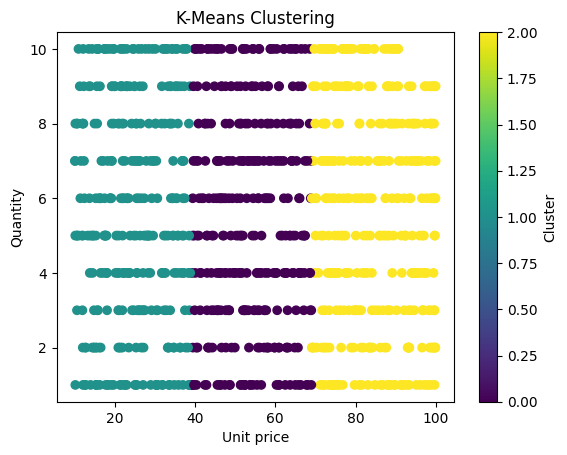

In [45]:

# features to plot
x = 'Unit price'
y = 'Quantity'

# Plottiug clusters
plt.scatter(sales[x], sales[y], c=sales['Cluster'], cmap='viridis')
plt.xlabel(x)
plt.ylabel(y)
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


##Predicting Customer Type

In [46]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'date', 'day', 'month', 'year', 'Hour', 'Cluster'],
      dtype='object')

Logistic Regression Accuracy: 0.45226130653266333
Decision Tree Accuracy: 0.5175879396984925
Random Forest Accuracy: 0.48743718592964824
SVM Accuracy: 0.4020100502512563


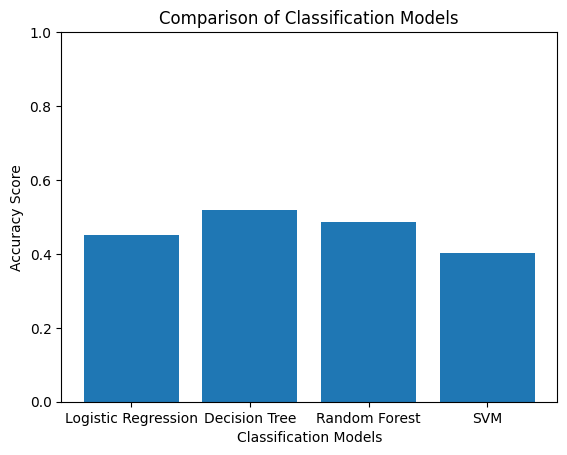

In [47]:

X = sales[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'gross margin percentage', 'Rating']]
y = sales['Customer type']


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculating accuracy score
accuracylr = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracylr)


from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the accuracy score
accuracydtc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracydtc)





# Initialize and train the random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracyrfc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracyrfc)


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM classifier
svm = SVC()
svm.fit(X_train_scaled, y_train)

#  predictions on the scaled test set
y_pred = svm.predict(X_test_scaled)

#  accuracy score
accuracysvm = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracysvm)



# Accuracy scores of each model
accuracy_scores = [accuracylr, accuracydtc, accuracyrfc, accuracysvm]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']


plt.bar(models, accuracy_scores)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Classification Models')
plt.ylim(0, 1)
plt.show()



##The decision tree model had an accuracy of 0.517, which means that it correctly predicted the customer type 51.7% of the time.